#<font color='#97171e'>AIT - Master in Data Science</font> 📈
# **Module 8: Class 3-Exercises**

Using a data set with relevant variables to predict a heart disease (heart.csv), your goal will be to follow all the steps to preprocess the data.


## **<font color='#97171e'>Ejercicio 1</font>**

* Load the data.

* Check the main metrics.

* Check the data types.

* Decide which are the independent variables and which one is the target variable. Store the names of the variables in two different lists.

In [1]:
import pandas as pd

In [2]:
heart = pd.read_csv('Files/heart.csv')

In [3]:
heart.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [4]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
target_variable = ['HeartDisease']

In [6]:
indep_variables = list(heart.drop(columns='HeartDisease').columns)

## **<font color='#97171e'>Ejercicio 2</font>**

There's a variable that is an object but could be a binary 0, 1 column. Find it and make the proper replacement.

In [7]:
# Check ExerciseAngina
heart.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [8]:
heart.replace({'N': 0, 'Y': 1}, inplace=True)

In [9]:
heart.ExerciseAngina.unique()

array([0, 1], dtype=int64)

## **<font color='#97171e'>Ejercicio 3</font>**

* Check the distribution of the numerical variables using graphs.
* Run tests to decide if the numerical columns are normal distributed or not.


In [10]:
cat_col = list(heart.select_dtypes(include="object").columns) # seleccionamos las columnas del tipo object
num_col = (heart.drop(columns=cat_col+target_variable).columns)

C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_9496\2946943787.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[col], ax=axes[index])
C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_9496\2946943787.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[col], ax=axe

Text(0.5, 1.05, 'Numerical variables distributions')

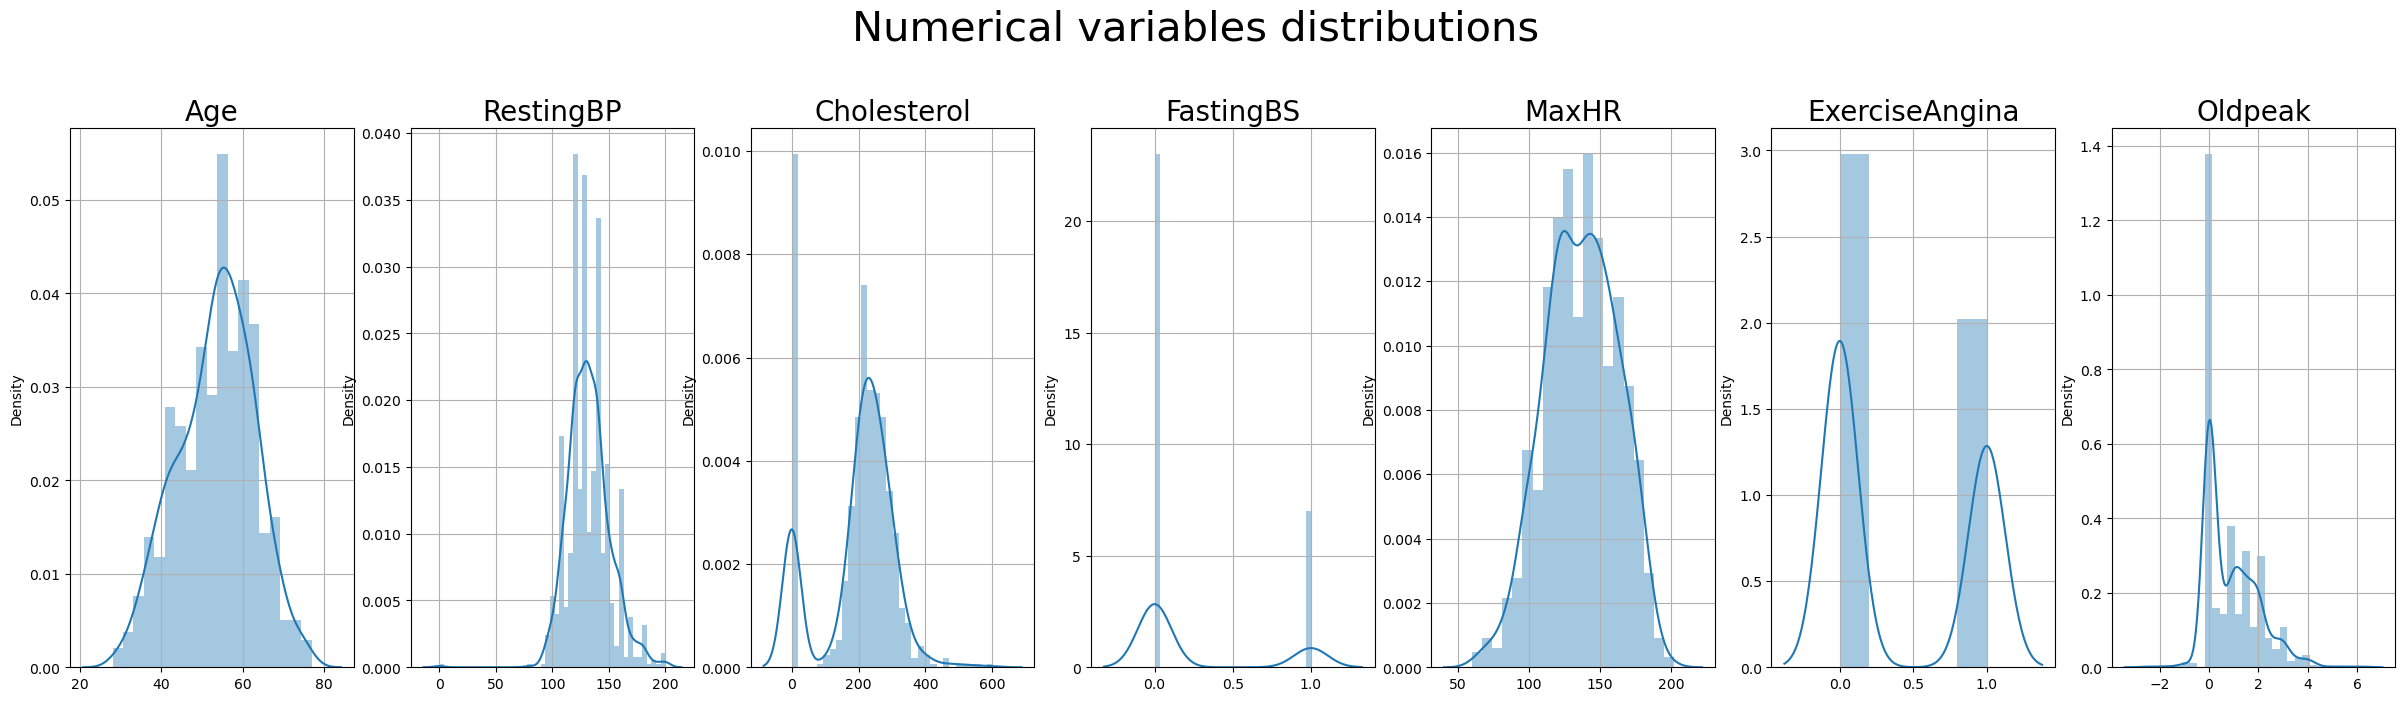

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cant = len(num_col)
fig, axes = plt.subplots(1, cant, figsize=(30, 7))
indexes = list(range(cant))
col_dict = {indexes[i]: list(num_col)[i] for i in indexes}
for index, col in col_dict.items():
    sns.distplot(heart[col], ax=axes[index])
    axes[index].set_xlabel('', fontsize=15)
    axes[index].grid()
    axes[index].set_title(col, fontsize=20)
fig.suptitle('Numerical variables distributions', fontsize=30, y=1.05)



In [12]:
from scipy.stats import shapiro

for col  in num_col:
    # Aplicamos shapiro
    stat, p = shapiro(heart[col])

    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))
    # Interpretación de resultados
    alpha = 0.05
    if p > alpha:
        print('The feature ',col, ' comes from a normal distribution (we fail to reject H0) \n')
    else:
        print('The feature ',col, \
              ' does not come from a normal distribution (we reject H0), therefore H1 \n')

Valor de test=0.991, p-value=0.000
The feature  Age  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.958, p-value=0.000
The feature  RestingBP  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.871, p-value=0.000
The feature  Cholesterol  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.523, p-value=0.000
The feature  FastingBS  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.993, p-value=0.000
The feature  MaxHR  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.623, p-value=0.000
The feature  ExerciseAngina  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.860, p-value=0.000
The feature  Oldpeak  does not come from a normal distribution (we reject H0), therefore H1 



## **<font color='#97171e'>Ejercicio 4</font>**

Standarize the numerical columns

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

heart[num_col] = scaler.fit_transform(heart[num_col])

## **<font color='#97171e'>Ejercicio 5</font>**

Check the correlation between the numerical independent variables

<Axes: >

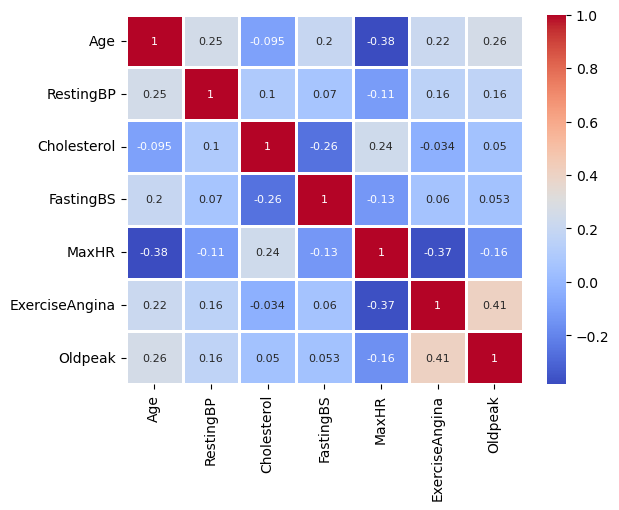

In [14]:
sns.heatmap(heart[num_col].corr(), annot=True,annot_kws={'fontsize':8}, fmt='.2g', linewidths=2, cmap='coolwarm')

## **<font color='#97171e'>Ejercicio 6</font>**

Change the data type of the categorical variables by a more suitable one.

In [15]:
for column_ in cat_col:
    heart[column_] = pd.Categorical(heart[column_])

In [16]:
heart.dtypes

Age                float64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS          float64
RestingECG        category
MaxHR              float64
ExerciseAngina     float64
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

## **<font color='#97171e'>Ejercicio 7</font>**

Make dummy variables from the categorical columns.

In [17]:
heart = pd.get_dummies(heart, columns=cat_col)

In [18]:
heart.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')